In [9]:
#These were the steps used to make individual files
# import pandas as pd
# filename = '../data/EarthChem_all.csv'
# chemdata=pd.read_csv(filename, sep=',', skipinitialspace=True)

# chemdata.columns.values


# c='SN'

# a=chemdata.columns.get_loc(c)

# df1=chemdata.iloc[:,[6,7,10,a]]
# df1=df1[(df1 != 0).all(1)]
# df1=df1.dropna()
# df1
# df1.to_csv("EarthChem"+c+".txt",index=False)

In [10]:
import numpy

In [11]:
import pandas

In [12]:
import matplotlib.pyplot as plt

In [13]:
filename = '/Users/annajamieson/mineralexplorationcourse/data/EarthChemFE.txt'

In [14]:
chemdata=numpy.loadtxt(filename, delimiter=',')

In [15]:
print(chemdata)

[[ 3.87450e+01 -1.06081e+02  2.80000e+01  4.27000e+03]
 [ 3.87450e+01 -1.06081e+02  2.80000e+01  3.79000e+03]
 [ 3.87450e+01 -1.06081e+02  2.80000e+01  4.19000e+03]
 ...
 [ 9.44830e+00 -5.47333e+01  9.27600e+01  1.95000e+04]
 [ 9.44830e+00 -5.47333e+01  9.29900e+01  1.09000e+04]
 [ 9.44830e+00 -5.47333e+01  9.32200e+01  1.14000e+04]]


In [16]:
print(chemdata.shape)

(164288, 4)


In [17]:
#Print the number in the first row and third column. 
#IMPORTANT: Python counts from 0

print(chemdata[1,2])

28.0


In [18]:
#Print the first row

print(chemdata[0,:])

[  38.745 -106.081   28.    4270.   ]


In [19]:
#Print the third column

print(chemdata[:,2])

[28.   28.   28.   ... 92.76 92.99 93.22]


In [20]:
#Print the first two columns for row id 2, 5 and 6. 

print(chemdata[[2,5,6],0:2])

[[  38.745  -106.081 ]
 [  39.6049 -106.517 ]
 [  39.6049 -106.517 ]]


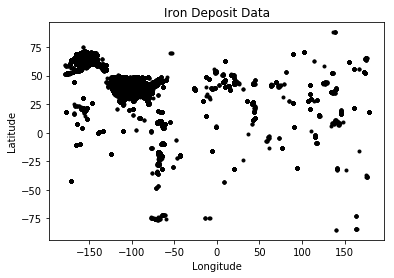

In [21]:
#plotting data
#Plot the lats and lons, i.e. the first column vs the second column
plt.plot(chemdata[:,1],chemdata[:,0],'k.')
plt.title('Iron Deposit Data')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

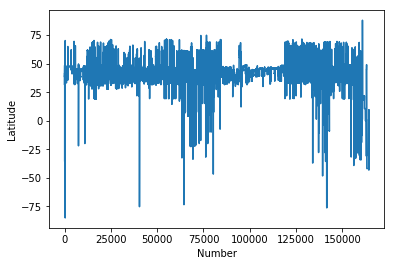

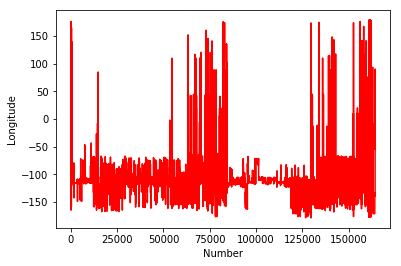

In [22]:
#Plot the Latitudes
plt.plot(chemdata[:,0])
plt.ylabel('Latitude')
plt.xlabel('Number')
plt.show()

#Plot the Longitudes
plt.plot(chemdata[:,1],'r')
plt.ylabel('Longitude')
plt.xlabel('Number')
plt.show()

In [23]:
#Clean up the data, remove anything outside lat lon extent

#Find all the "chemdata" column 1 (i.e. longitude) data points that are greater than -180, save it in a new variable
where_longitude_above_min = chemdata[:,1]>-180
fedata=chemdata[where_longitude_above_min]
#Repeat for less than 180
where_longitude_below_max = fedata[:,1]<180
fedata2=fedata[where_longitude_below_max]

In [24]:
goodlat=fedata2[:,0]<90
print(goodlat)

[ True  True  True ...  True  True  True]


In [25]:
goodlat.shape

(164288,)

In [26]:
fedata2

array([[ 3.87450e+01, -1.06081e+02,  2.80000e+01,  4.27000e+03],
       [ 3.87450e+01, -1.06081e+02,  2.80000e+01,  3.79000e+03],
       [ 3.87450e+01, -1.06081e+02,  2.80000e+01,  4.19000e+03],
       ...,
       [ 9.44830e+00, -5.47333e+01,  9.27600e+01,  1.95000e+04],
       [ 9.44830e+00, -5.47333e+01,  9.29900e+01,  1.09000e+04],
       [ 9.44830e+00, -5.47333e+01,  9.32200e+01,  1.14000e+04]])

In [27]:

#Repeat for latitudes less than 90
fedata3=fedata2[fedata2[:,0]<90]
#Repeat for greater than -90
fedata4=fedata3[fedata3[:,0]>-90]


print("We have removed", chemdata.shape[0]-fedata4.shape[0], "samples")

We have removed 0 samples


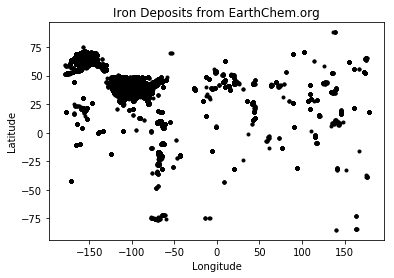

In [28]:
plt.plot(fedata4[:,1],fedata4[:,0],'k.')
plt.title('Iron Deposits from EarthChem.org')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()


In [29]:
import numpy as np
def reject_outliers(data):
    m = 3
    u = np.mean(data)
    print("mean is:", u)
    s = np.std(data)
    print("std is:", s)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    print("removed:",np.shape(data)[0] - np.shape(filtered)[0])
    return filtered

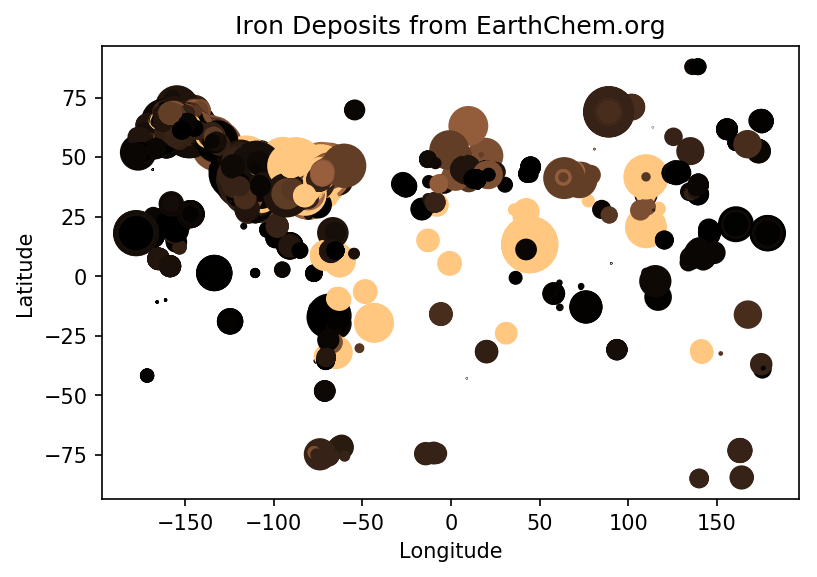

In [30]:
lats=fedata4[:,0]
longs=fedata4[:,1]
age=fedata4[:,3]
iron=fedata4[:,2]

#lats_rich=lats[iron>2]

fig = plt.figure(figsize=(6,4),dpi=150)

plt.scatter(longs,lats,s=age/1000,c=iron,vmin=0, vmax=1000,cmap=plt.cm.copper)
plt.title('Iron Deposits from EarthChem.org')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

In [31]:
filtered_age=reject_outliers(iron)

mean is: 611.3378947291646
std is: 976.9708801319497
removed: 16653


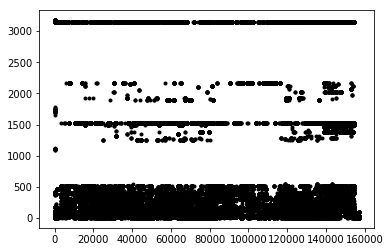

In [32]:
plt.plot(iron[iron>1],'k.')
plt.show()

In [33]:
#Import another module called Cartopy - great for plotting things on globes
import cartopy.crs as ccrs

#Make new variables from our array (so it is easier to see what we are doing)
lats=fedata4[:,0]
longs=fedata4[:,1]
age=fedata4[:,2]

#######
## Make the figure
#######

#Create a figure object
fig = plt.figure(figsize=(16,12),dpi=150)

#Make a map projection to plot on.
ax = plt.axes(projection=ccrs.Robinson())

#Add some Earth-specific details (from the cartopy package)
ax.set_global()
#ax.coastlines('50m', linewidth=0.8)
ax.stock_img()
ax.gridlines()

#Make a scatter plot of the data coloured by age. 
#Restrict the colour range between 0 and 2000
#And also set the scatter plot as a variable 'mapscat' so we can reference it later
mapscat=ax.scatter(longs,lats,marker=".",c=age,vmin=0,vmax=2000,transform=ccrs.Geodetic(),zorder=4,cmap=plt.cm.copper)

#Make a Colorbar
cbar=plt.colorbar(mapscat, ax=ax, orientation="horizontal", pad=0.05, fraction=0.15, shrink=0.5,extend='max')
cbar.set_label('Age (Ma)')

# Add a map title, and tell the figure to appear on screen
plt.title('Age of Iron Deposits in the EarthChem.org database')
plt.show()

ModuleNotFoundError: No module named 'cartopy'

In [ ]:
mu = np.mean(age) #mean of distribution
sigma = np.std(age) #standard deviation of distribution
x=age

In [ ]:
#histogram of the data
plt.hist(x,bins=[0,20,40,60,80,100,120,140,160,180,200])
plt.xlabel('Age (Ma)')
plt.ylabel ('Count')
mystring="Histogram with a mean of "+str(mu)
plt.title(mystring)

#tweak spacing to prevent clipping of ylabel
#plt.subplots_adjust(left=0.15)
plt.show()

In [ ]:
print(mu)